In [1]:
import urllib2
from cookielib import CookieJar

RAIZ = '/home/usuario'

# Realizando o primeiro acesso e bypass do captcha
cj = CookieJar()
opener = urllib2.build_opener(urllib2.HTTPCookieProcessor(cj))

response = opener.open("http://despesa.pmnf.rj.gov.br:8040/webrun/executeRule.do?action=executeRule&pType=2&ruleName=Atualizar%20GRID%20Captcha%20Correto%20-%20Consulta%20Despesa&sys=LAI&formID=10057&parentRID=-1&P_0=2015&P_1=&P_2=&P_3=1&P_4=&P_5=&P_6=1&P_7=")

In [2]:
import re
import csv

# Criando um .csv com as informações do grid
count = 0
while (count <= 2280):
    response = opener.open("http://despesa.pmnf.rj.gov.br:8040/webrun/navigate.do?sys=LAI&formID=10057&componentID=688247&action=navigate&param=previous&inner=true&gt=%s" % count) 
    content = response.read()

    values = re.findall(r'\r\n\[.*?\]', content, re.DOTALL | re.MULTILINE)
    invalid_chars = ['\'', ']', '[', '"']

    i=0
    while (i < 15):
        values[i] = values[i].replace('\',',';')
        values[i] = values[i].translate(None, ''.join(invalid_chars))
        i=i+1
 
    with open('/home/anderson/dev/github/pmnf/despesas/despesas2015.csv', 'a') as fp:
        a = csv.writer(fp, delimiter=';')
        a.writerows([values])

    count = count + 15

KeyboardInterrupt: 

In [2]:
#Carregando arquivo csv de despesas

DESPESAS2015 = RAIZ +"/pmnf/despesas/despesas2015.csv"

In [3]:
import pandas as pd
import locale
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline
matplotlib.style.use('ggplot')


locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [4]:
despesas2015 = pd.read_csv( DESPESAS2015 , sep=";", encoding='latin1', quoting=3, na_filter=True,
                            usecols = [u'NOME_FAVORECIDO',u'VALOR', 'CNPJ_FAVORECIDO', 'DATA'],
                          )
pd.options.display.float_format = 'R$ {:.2f}'.format

despesas2015[:10]

,VALOR,DATA,NOME_FAVORECIDO,CNPJ_FAVORECIDO
0,R$ 8282.00,23/07/2015,100% EMBALAGENS DISTRIBUIDORA DE ALÃM PARAÃ...,4168271000292
1,R$ 1948.40,23/07/2015,100% EMBALAGENS DISTRIBUIDORA DE ALÃM PARAÃ...,4168271000292
2,R$ 9714.39,23/07/2015,100% EMBALAGENS DISTRIBUIDORA DE ALÃM PARAÃ...,4168271000292
3,R$ 0.00,28/07/2015,3 TEC LTDA ME,329754000190
4,R$ 30800.00,09/09/2015,ABÃBADA PROJETOS E OBRAS LTDA,1310974000134
5,R$ 11200.00,23/10/2015,ABS LOPES REPRESENTAÃÃO COMERCIAL,7687910000133
6,R$ 1506.00,23/10/2015,ABS LOPES REPRESENTAÃÃO COMERCIAL,7687910000133
7,R$ 111767.00,06/02/2015,ACAO SOCIAL ANCHIETA-CRECHE BERCARIO SAO JOSE,30177273000177
8,R$ 111767.00,06/02/2015,ACAO SOCIAL ANCHIETA-CRECHE BERCARIO SAO JOSE,30177273000177
9,R$ 13578.00,02/01/2015,ACEPEL COMÃRCIO DE ALIMENTOS TRIRRIENSE LTDA,10881034000196


In [9]:
## As 30 maiores despesas de 2015

despesa_acumulada = despesas2015.groupby(["CNPJ_FAVORECIDO", "NOME_FAVORECIDO"], as_index=True)
TOP30 = despesa_acumulada.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30


,,VALOR
CNPJ_FAVORECIDO,NOME_FAVORECIDO,
28606630000123,FOLHA DE PAGAMENTO,R$ 258105083.97
29979036000140,INSS - INSTITUTO NACIONAL DA SEGURIDADE SOCIAL,R$ 34078700.71
83837000141,INSTITUTO UNIR SAÃDE - UNIR,R$ 16290000.00
360305000104,FGTS,R$ 15531564.77
1369424000433,EBMA EMPRESA BRASILEIRA DE MEIO AMBIENTE,R$ 15290445.55
3119806000191,Ãguas de Nova Friburgo,R$ 14268456.03
28606630000123,AUXÃLIO TRANSPORTE,R$ 12834040.79
7032277000145,FUNDO MUNICIPAL DE PREVIDÃNCIA SOCIAL DE NOVA FRIBURGO,R$ 11710129.64
33249046000106,ENERGISA NOVA FRIBURGO DISTRIBUIDORA DE ENERGIA SA,R$ 9828479.81


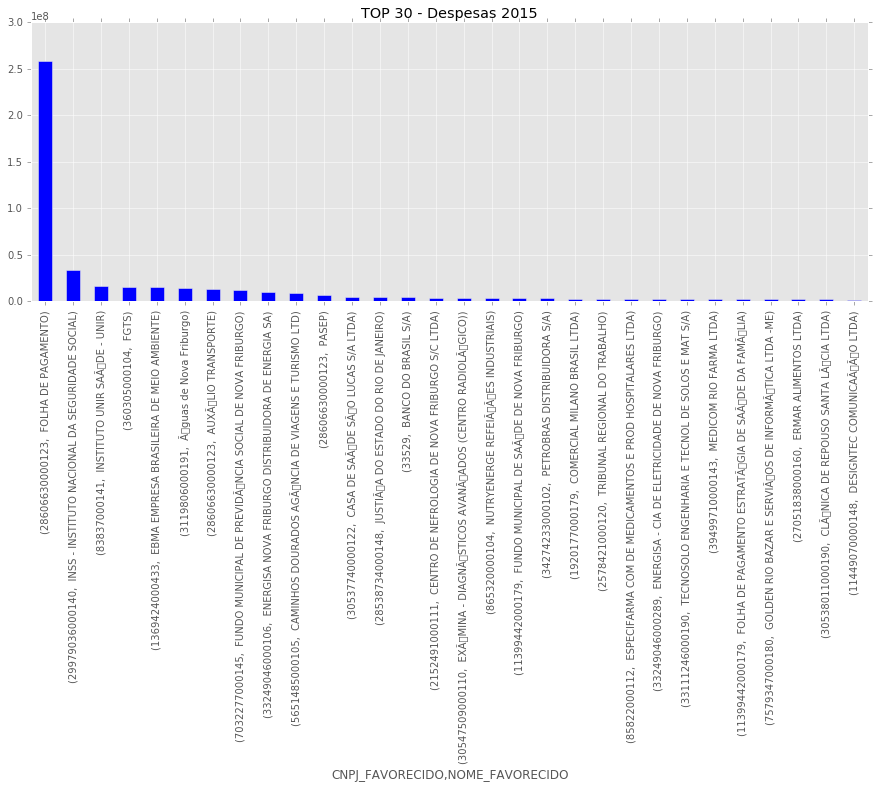

In [10]:
TOP30['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Despesas 2015')

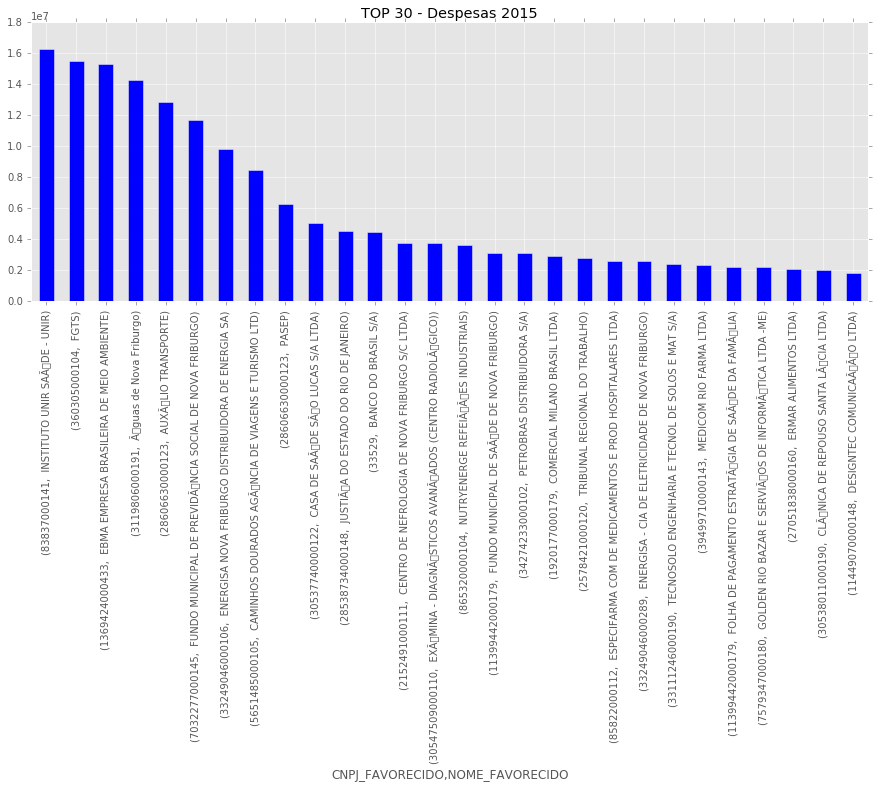

In [11]:
## As 30 maiores despesas de 2015 com exceção da Folha de Pagamento e INSS

despesa_acumulada = despesas2015.groupby(["CNPJ_FAVORECIDO", "NOME_FAVORECIDO"], as_index=True)
TOP30exc = despesa_acumulada.sum().sort_values('VALOR',ascending=[False])[2:30]
TOP30exc['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Despesas 2015')

In [7]:
def carregar_dataframe(caminho):
    new_dataframe = pd.read_csv( caminho , sep=";", encoding='latin1', quoting=3, na_filter=True, 
                            usecols = [u'FORNECEDOR',u'VALOR', 'ASSINATURA'],
                           )
    
    return new_dataframe

In [8]:
# Carregando arquivos de Contratos
PREFEITURA = 'PMNF'

CONTRATOS2010 = RAIZ + "/pmnf/contratos/2010.csv"
CONTRATOS2011 = RAIZ + "/pmnf/contratos/2011.csv"
CONTRATOS2012 = RAIZ + "/pmnf/contratos/2012.csv"
CONTRATOS2013 = RAIZ + "/pmnf/contratos/2013.csv"
CONTRATOS2014 = RAIZ + "/pmnf/contratos/2014.csv"
CONTRATOS2015 = RAIZ + "/pmnf/contratos/2015.csv"

In [9]:
## Carregando os arquivos para os dataframes

contratos2015 = carregar_dataframe(CONTRATOS2015) 
contratos2014 = carregar_dataframe(CONTRATOS2014)
contratos2013 = carregar_dataframe(CONTRATOS2013)
contratos2012 = carregar_dataframe(CONTRATOS2012)
contratos2011 = carregar_dataframe(CONTRATOS2011)
contratos2010 = carregar_dataframe(CONTRATOS2010)

In [64]:
## Exibindo todos os contratos

TodosContratos = contratos2015.append(contratos2014).append(contratos2013).append(contratos2012).append(contratos2011).append(contratos2010)
TodosContratos

,ASSINATURA,FORNECEDOR,VALOR
0,12/01/2015,TELEMAR NORTE LESTE S.A. - OI,R$ 533884.56
1,01/01/2015,LUIZ HENRIQUE DE SOUZA DUTRA DA COSTA,R$ 11262.44
2,01/01/2015,MUNICÍPIO DE NOVA FRIBURGO,R$ 3500.00
3,01/01/2015,MUNICÍPIO DE NOVA FRIBURGO,R$ 2003.68
4,01/01/2015,FRIGAS FRIBURGO REVENDEDORA DE GAS LTDA,R$ 334100.00
5,26/01/2015,FABICON ENGENHARIA CONSTRUTORA E PAISAGISMO LTDA.,R$ 648024.54
6,16/01/2015,GRANRIO ENGENHARIA LTDA,R$ 1463947.48
7,27/01/2015,ECOM - SISTEMA ENGENHARIA E MEIO AMBIENTE LTDA ME,R$ 692391.28
8,01/01/2015,W. SUCESSO DE FRIBURGO COM DE PROD. ALIMEN. B...,R$ 161500.00
9,01/01/2015,FRIGAS FRIBURGO REVENDEDORA DE GAS LTDA,R$ 41527.20


In [51]:
#Os 30 que mais lucraram com contratos desde 2010

TopContratos = TodosContratos.groupby(["FORNECEDOR"], as_index=True).sum().sort_values('VALOR',ascending=[False])[:30]
TopContratos

,VALOR
FORNECEDOR,
CAMINHOS DOURADOS AGENCIA DE VIAGENS E TURISMO LTD,R$ 34813133.58
SOPE - SOCIEDADE DE OBRAS E PROJETOS DE ENGENHARIA,R$ 14786723.28
COMERCIAL MILANO BRASIL LTDA.,R$ 11439424.00
ERMAR ALIMENTOS LTDA,R$ 10270016.31
PETROBRAS DISTRIBUIDORA S.A,R$ 7629475.75
TRANSRIO CAMINHAO.ONIBUS.MAQUINA E MOTORES LTDA,R$ 6500000.00
FABICON ENGENHARIA CONSTRUTORA E PAISAGISMO LTDA.,R$ 4647957.49
ECOM - SISTEMA ENGENHARIA E MEIO AMBIENTE LTDA ME,R$ 4495461.08
Vital Engenhria Ambietal S/A,R$ 4320136.08


In [71]:
## O ano de maior gasto com contratos desde 2010
TodosContratos['ASSINATURA'] = pd.to_datetime(TodosContratos['ASSINATURA'])
TodosContratos['ANO'] = TodosContratos['ASSINATURA'].dt.year
TopAnoContratos = TodosContratos.groupby(['ANO'], as_index=True).sum().sort_values('VALOR',ascending=[False])[:30]

TopAnoContratos


,VALOR
ANO,
2015,R$ 54742805.67
2014,R$ 54651517.28
2013,R$ 41007406.86
2012,R$ 36386256.38
2011,R$ 31975424.74
2010,R$ 7081941.74


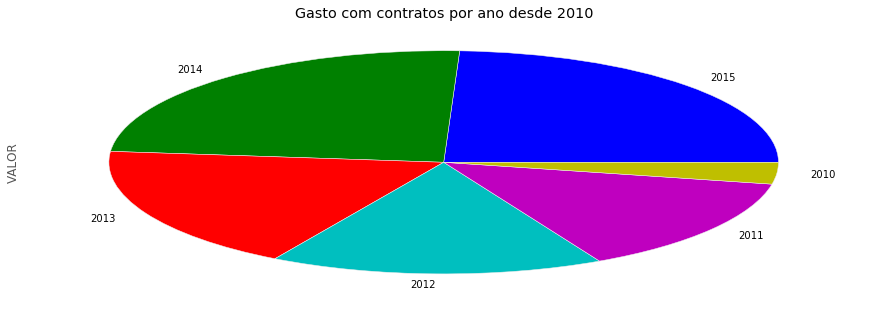

In [74]:
TopAnoContratos['VALOR'].plot(kind='pie', figsize=(15,5), title=u'Gasto com contratos por ano desde 2010')

In [10]:
# Carregando arquivos de Convenios

CONVENIOS2010 = RAIZ + "/pmnf/convenios/2010.csv"
CONVENIOS2011 = RAIZ + "/pmnf/convenios/2011.csv"
CONVENIOS2012 = RAIZ + "/pmnf/convenios/2012.csv"
CONVENIOS2013 = RAIZ + "/pmnf/convenios/2013.csv"
CONVENIOS2014 = RAIZ + "/pmnf/convenios/2014.csv"
CONVENIOS2015 = RAIZ + "/pmnf/convenios/2015.csv"


In [11]:
## Carregando os arquivos para os dataframes

convenios2015 = carregar_dataframe(CONVENIOS2015)
convenios2014 = carregar_dataframe(CONVENIOS2014)
convenios2013 = carregar_dataframe(CONVENIOS2013)
convenios2012 = carregar_dataframe(CONVENIOS2012)
convenios2011 = carregar_dataframe(CONVENIOS2011)
convenios2010 = carregar_dataframe(CONVENIOS2010)

In [12]:
TodosConvenios = convenios2015.append(convenios2014).append(convenios2013).append(convenios2012).append(convenios2011).append(convenios2010)
TodosConvenios

,ASSINATURA,FORNECEDOR,VALOR
0,16/01/2015,G.R. BLOCO CARNAVALESCO GLOBO DE OURO,R$ 26000.00
1,16/01/2015,G.R. BLOCO CARNAVALESCO UNIDOS DO IMPERADOR,R$ 26000.00
2,16/01/2015,G.R.E.S UNIDOS DA SAUDADE,R$ 52000.00
3,24/01/2015,MUNICÍPIO DE NOVA FRIBURGO,R$ 1.00
4,13/02/2015,PREFEITURA MUNICIPAL DE NOVA FRIBURGO,R$ 66000.00
5,10/02/2015,PREFEITURA MUNICIPAL DE NOVA FRIBURGO,R$ 292747.92
6,13/02/2015,PREFEITURA MUNICIPAL DE NOVA FRIBURGO,R$ 108407.00
7,13/02/2015,MUNICÍPIO DE NOVA FRIBURGO,R$ 55000.00
8,13/02/2015,MUNICÍPIO DE NOVA FRIBURGO,R$ 134358.40
9,01/02/2015,MUNICÍPIO DE NOVA FRIBURGO,R$ 1.00


In [79]:
#Os 30 que mais lucraram com convenios desde 2010

TopConvenios = TodosConvenios.groupby(["FORNECEDOR"], as_index=True).sum().sort_values('VALOR',ascending=[False])[:30]
TopConvenios

,VALOR
FORNECEDOR,
CRECHE COLMEIA DO SENHOR,R$ 2988563.60
ASSOC FRIBURG. DE AMIGOS E PAIS DO EDUCANDO AFAPE,R$ 1903065.66
ASSOCIACAO DE PAIS E AMIGOS DOS EXCEPCIONAIS-APAE,R$ 1749427.05
ASSOCIACAO DE PAIS E AMIGOS DA CRIANCA- APAC,R$ 1167654.80
INSTITUTO BELGICA-NOVA FRIBURGO,R$ 966157.25
GRUPO DE PROMOCAO HUMANA - GPH,R$ 804121.32
ACAO SOCIAL ANCHIETA - ASA,R$ 770448.85
LAR ABRIGO AMOR A JESUS,R$ 693000.00
SOCIEDADE MUSICAL BENEFIC. CAMPESINA FRIBURGUENSE,R$ 676639.91


In [80]:
## O ano de maior gasto com convenios desde 2010
TodosConvenios['ASSINATURA'] = pd.to_datetime(TodosConvenios['ASSINATURA'])
TodosConvenios['ANO'] = TodosConvenios['ASSINATURA'].dt.year
TopAnoConvenios = TodosConvenios.groupby(['ANO'], as_index=True).sum().sort_values('VALOR',ascending=[False])[:30]

TopAnoConvenios

,VALOR
ANO,
2015,R$ 4542169.52
2014,R$ 4208543.20
2013,R$ 4038057.07
2012,R$ 2420547.13
2011,R$ 1561540.22
2010,R$ 762207.98


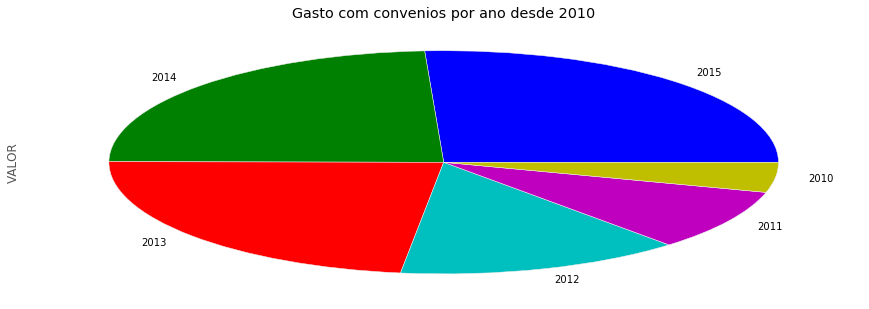

In [81]:
TopAnoConvenios['VALOR'].plot(kind='pie', figsize=(15,5), title=u'Gasto com convenios por ano desde 2010')

In [48]:
## Maiores contratos de 2015

maiores_contratos2015 = contratos2015.groupby(["FORNECEDOR"], as_index=True)
TOP30Contratos2015 = maiores_contratos2015.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Contratos2015

,VALOR
FORNECEDOR,
CAMINHOS DOURADOS AGENCIA DE VIAGENS E TURISMO LTD,R$ 8877493.98
COMERCIAL MILANO BRASIL LTDA.,R$ 2965958.00
CENTRO DE NEFROLOGIA DE N. FRIB.LTDA,R$ 2530273.52
ECOM - SISTEMA ENGENHARIA E MEIO AMBIENTE LTDA ME,R$ 2371609.81
ERMAR ALIMENTOS LTDA,R$ 2210175.30
GRANRIO ENGENHARIA LTDA,R$ 1969059.65
CENTRO RADIOLÓGICO DE NOVA FRIBURGO LTDA.,R$ 1850268.82
DESIGNETEC COMUNICAÇÃO LTDA ME,R$ 1800000.00
MODERNIZAÇÃO PUBLICA E INFORMATICA LTDA - EPP,R$ 1775000.00


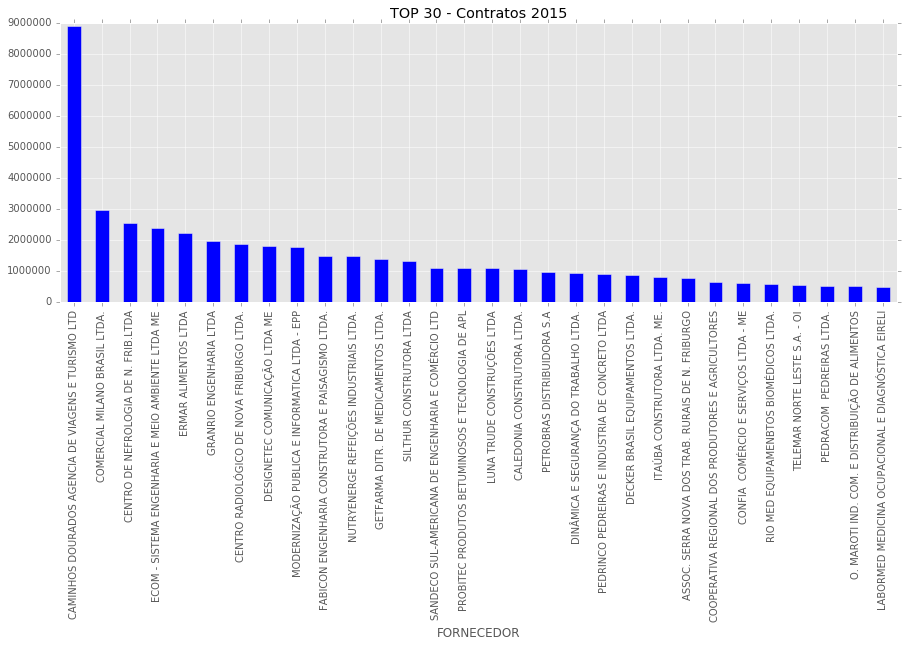

In [119]:
TOP30Contratos2015['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Contratos 2015')

In [120]:
maiores_contratos2014 = contratos2014.groupby(["FORNECEDOR"], as_index=True)
TOP30Contratos2014 = maiores_contratos2014.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Contratos2014

,VALOR
FORNECEDOR,
SOPE - SOCIEDADE DE OBRAS E PROJETOS DE ENGENHARIA,R$ 9066262.61
CAMINHOS DOURADOS AGENCIA DE VIAGENS E TURISMO LTD,R$ 7970000.00
TRANSRIO CAMINHAO.ONIBUS.MAQUINA E MOTORES LTDA,R$ 6500000.00
ENGREST-ENGENHARIA DE RECUPERACAO ETRUTURAL LTDA.,R$ 3489217.30
COMERCIAL MILANO BRASIL LTDA.,R$ 2561890.00
VALENCE MÁQUINAS E EQUIPAMENTOS LTDA,R$ 2310000.00
BOMAG MARINI EQUIPAMENTOS LTDA.,R$ 2285000.00
PETROBRAS DISTRIBUIDORA S.A,R$ 1753260.00
INSTITUTO UNIR SAUDE,R$ 1398000.00


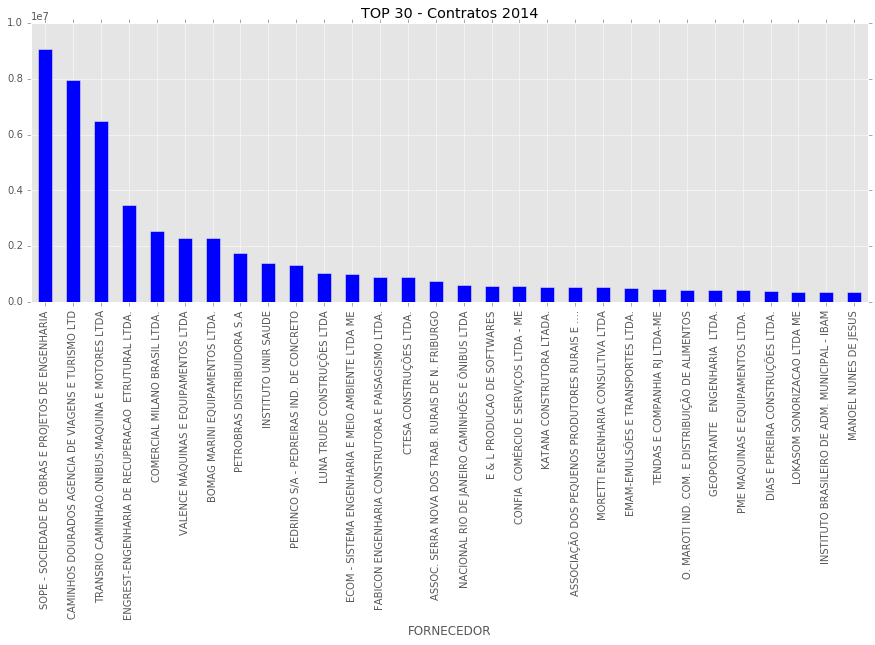

In [121]:
TOP30Contratos2014['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Contratos 2014')

In [122]:
maiores_contratos2013 = contratos2013.groupby(["FORNECEDOR"], as_index=True)
TOP30Contratos2013 = maiores_contratos2013.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Contratos2013

,VALOR
FORNECEDOR,
CAMINHOS DOURADOS AGENCIA DE VIAGENS E TURISMO LTD,R$ 7850000.00
WORKING EMPREENDIMETOS E SERVIÇOS LTDA. EPP,R$ 4182027.71
CENTRO DE CIDADANIA CIDADE MARAVILHOSA,R$ 3194000.00
SOPE - SOCIEDADE DE OBRAS E PROJETOS DE ENGENHARIA,R$ 2232353.52
COMERCIAL MILANO BRASIL LTDA.,R$ 2161778.00
INSTITUTO DE DESENVOLVIMENTO GERENCIAL S/A,R$ 2021993.28
GEOPORTANTE ENGENHARIA LTDA.,R$ 1998630.88
ERMAR ALIMENTOS LTDA,R$ 1934319.00
TECNOSOLO ENGENHARIA E TECNOLOGIA DE SOLOS E MATER,R$ 1908140.25


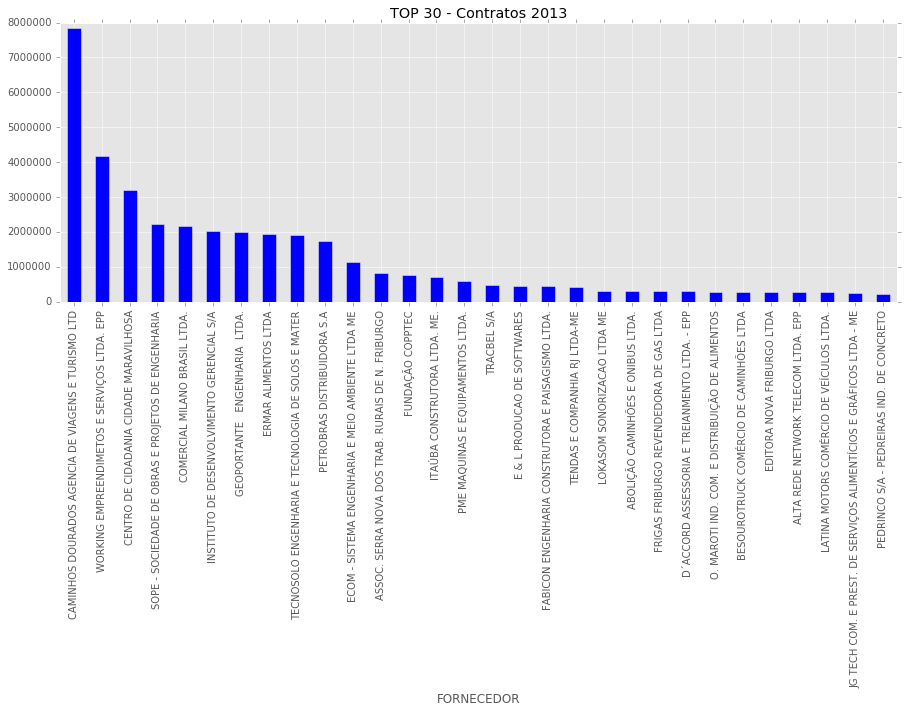

In [123]:
TOP30Contratos2013['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Contratos 2013')

In [124]:
maiores_contratos2012 = contratos2012.groupby(["FORNECEDOR"], as_index=True)
TOP30Contratos2012 = maiores_contratos2012.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Contratos2012

,VALOR
FORNECEDOR,
CAMINHOS DOURADOS AGENCIA DE VIAGENS E TURISMO LTD,R$ 4991303.20
ERMAR ALIMENTOS LTDA,R$ 3338031.00
RM SERVIÇOS E MANUTENÇÕES PREDIAIS LTDA,R$ 3087423.82
MARPA REPRESENTAÇÕES E EMPREENDIMENTOS LTDA,R$ 2449927.20
COMERCIAL MILANO BRASIL LTDA.,R$ 2406579.00
CONAN CONSTRUÇÕES E MONTAGENS LTDA.,R$ 1934705.37
TELEMAR NORTE LESTE S.A. - OI,R$ 1680000.00
CH CONSTRUÇÃO E SERVIÇO LTDA,R$ 1571450.00
SOPE - SOCIEDADE DE OBRAS E PROJETOS DE ENGENHARIA,R$ 1524629.18


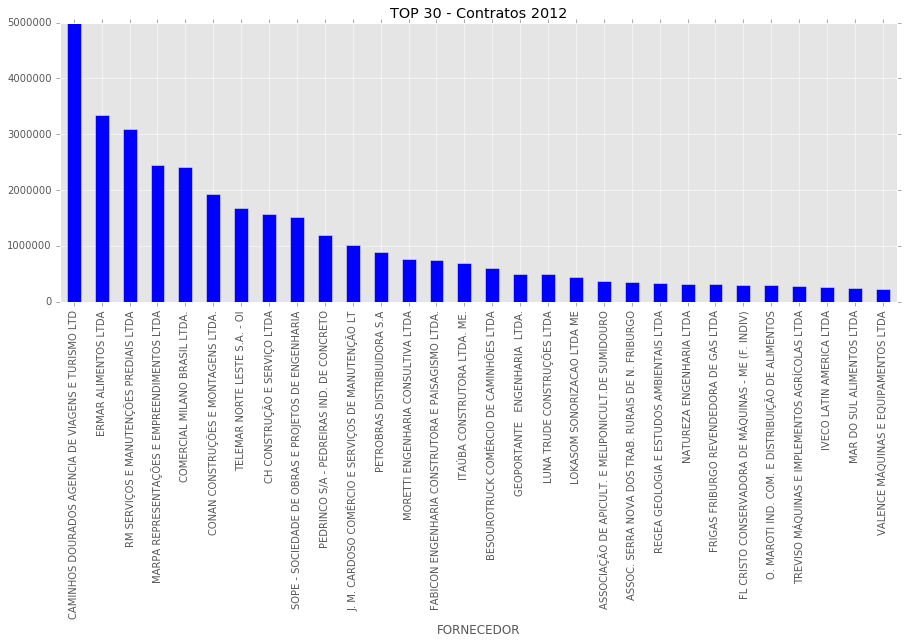

In [125]:
TOP30Contratos2012['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Contratos 2012')

In [126]:
maiores_contratos2011 = contratos2011.groupby(["FORNECEDOR"], as_index=True)
TOP30Contratos2011 = maiores_contratos2011.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Contratos2011

,VALOR
FORNECEDOR,
CAMINHOS DOURADOS AGENCIA DE VIAGENS E TURISMO LTD,R$ 5124336.40
Vital Engenhria Ambietal S/A,R$ 4320136.08
ERMAR ALIMENTOS LTDA,R$ 2650154.81
TERRAPLENO TERRAPLANAGEM E CONSTRUÇÃO LTDA,R$ 2059894.53
S&S CONSTRUÇÕES E INCORPORAÇÕES LTDA.,R$ 1977999.52
SOPE - SOCIEDADE DE OBRAS E PROJETOS DE ENGENHARIA,R$ 1963477.97
PETROBRAS DISTRIBUIDORA S.A,R$ 1533398.75
COMERCIAL MILANO BRASIL LTDA.,R$ 1343219.00
NATUREZA ENGENHARIA LTDA,R$ 1062475.85


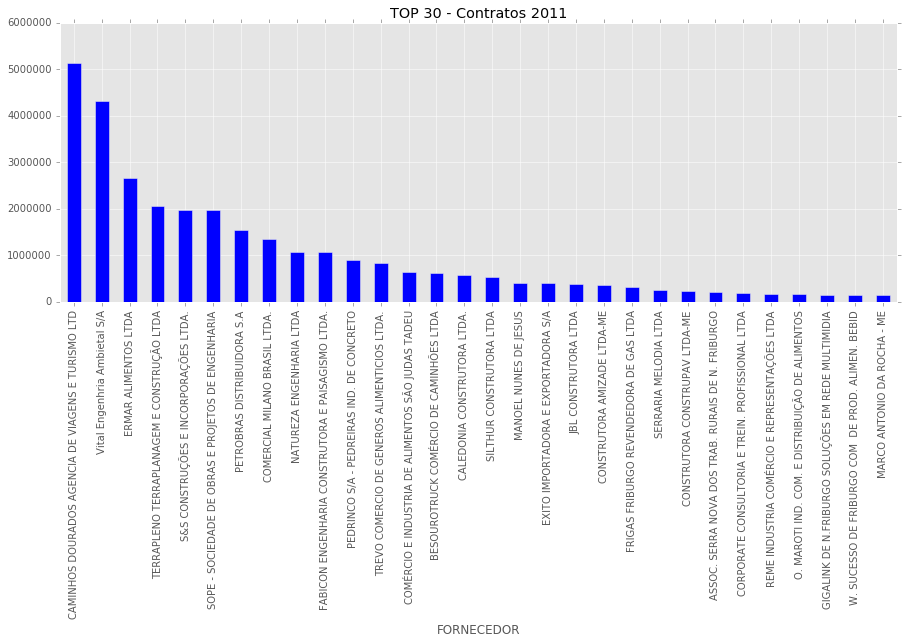

In [127]:
TOP30Contratos2011['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Contratos 2011')

In [128]:
maiores_contratos2010 = contratos2010.groupby(["FORNECEDOR"], as_index=True)
TOP30Contratos2010 = maiores_contratos2010.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Contratos2010

,VALOR
FORNECEDOR,
CONSTRUTORA TARDOCK LTDA-EPP,R$ 1768324.17
Brumar Construtora Ltda,R$ 1704932.15
CALEDONIA CONSTRUTORA LTDA.,R$ 1081264.90
PETROBRAS DISTRIBUIDORA S.A,R$ 759195.00
ENGREST-ENGENHARIA DE RECUPERACAO ETRUTURAL LTDA.,R$ 434266.54
TREVO COMERCIO DE GENEROS ALIMENTICIOS LTDA.,R$ 418839.30
INSTITUTO BRASILEIRO DE ADM. MUNICIPAL - IBAM,R$ 360000.00
JG TECH COM. E PREST. DE SERVIÇOS ALIMENTÍCIOS E GRÁFICOS LTDA - ME,R$ 204000.00
ERICTEL ASSESSORIA DE TELECOMUNICACOES LTDA ME,R$ 50439.60


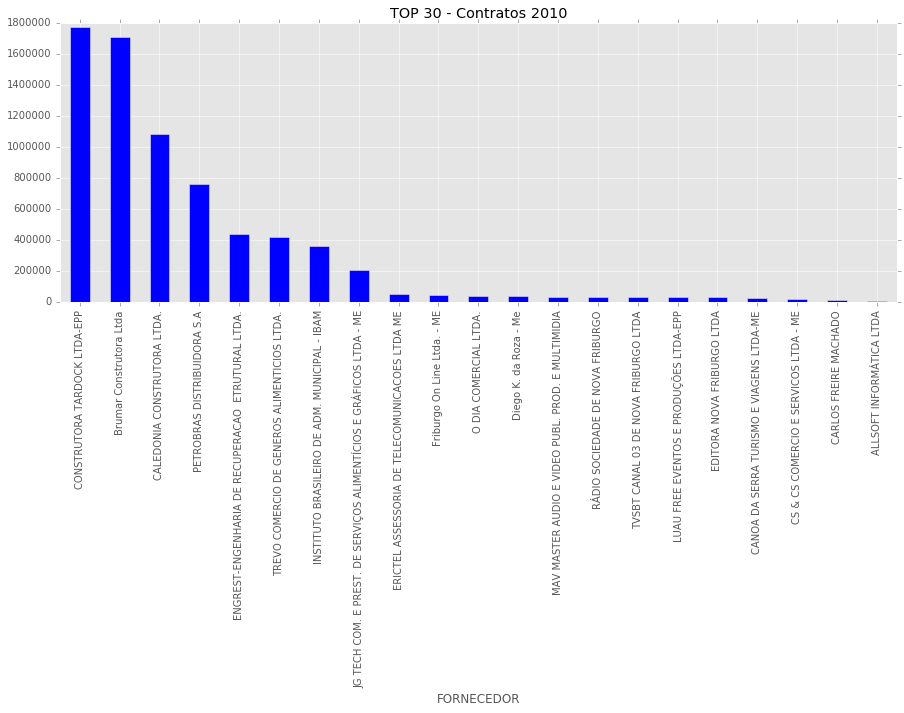

In [129]:
TOP30Contratos2010['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Contratos 2010')

In [36]:
maiores_convenios2015 = convenios2015.groupby(["FORNECEDOR"], as_index=True)
TOP30Convenios2015 = maiores_convenios2015.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Convenios2015

,VALOR
FORNECEDOR,
CRECHE COLMEIA DO SENHOR,R$ 701124.00
ASSOC FRIBURG. DE AMIGOS E PAIS DO EDUCANDO AFAPE,R$ 567627.20
PREFEITURA MUNICIPAL DE NOVA FRIBURGO,R$ 467154.92
ASSOCIACAO DE PAIS E AMIGOS DOS EXCEPCIONAIS-APAE,R$ 419126.00
LAR ABRIGO AMOR A JESUS,R$ 290000.00
ASSOCIACAO DE PAIS E AMIGOS DA CRIANCA- APAC,R$ 240000.00
INSTITUTO BELGICA-NOVA FRIBURGO,R$ 230000.00
ACAO SOCIAL ANCHIETA - ASA,R$ 225534.00
ASSOCIACAO CRIANCAS DO VALE DE LUZ,R$ 191485.00


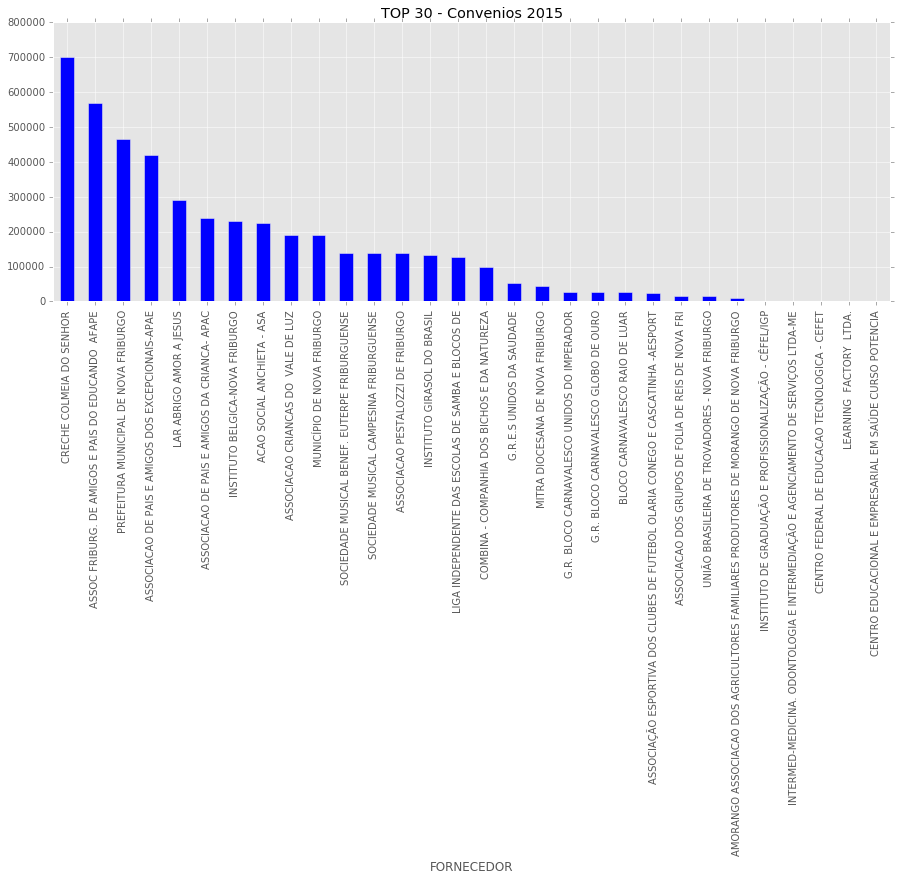

In [37]:
TOP30Convenios2015['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Convenios 2015')

In [38]:
maiores_convenios2014 = convenios2014.groupby(["FORNECEDOR"], as_index=True)
TOP30Convenios2014 = maiores_convenios2014.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Convenios2014

,VALOR
FORNECEDOR,
ASSOC FRIBURG. DE AMIGOS E PAIS DO EDUCANDO AFAPE,R$ 651026.24
CRECHE COLMEIA DO SENHOR,R$ 640113.60
ASSOCIACAO DE PAIS E AMIGOS DOS EXCEPCIONAIS-APAE,R$ 479575.84
ASSOCIACAO DE PAIS E AMIGOS DA CRIANCA- APAC,R$ 376154.00
MITRA DIOCESANA DE NOVA FRIBURGO,R$ 246078.00
ACAO SOCIAL ANCHIETA - ASA,R$ 203212.00
ASSOCIACAO PESTALOZZI DE FRIBURGO,R$ 187008.00
INSTITUTO BELGICA-NOVA FRIBURGO,R$ 184157.25
INSTITUTO GIRASOL DO BRASIL,R$ 177008.00


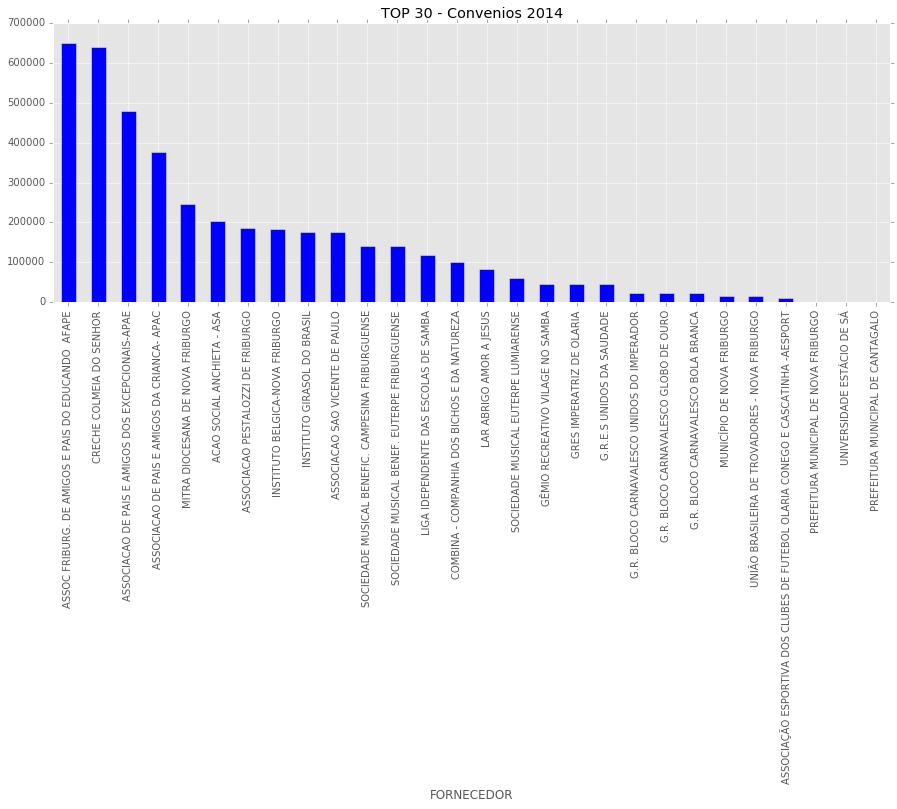

In [39]:
TOP30Convenios2014['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Convenios 2014')

In [135]:
maiores_convenios2013 = convenios2013.groupby(["FORNECEDOR"], as_index=True)
TOP30Convenios2013 = maiores_convenios2013.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Convenios2013

,VALOR
FORNECEDOR,
CRECHE COLMEIA DO SENHOR,R$ 604800.00
ASSOCIACAO DE PAIS E AMIGOS DA CRIANCA- APAC,R$ 473625.60
SOCIEDADE MUSICAL BENEFIC. CAMPESINA FRIBURGUENSE,R$ 368639.91
GRUPO DE PROMOCAO HUMANA - GPH,R$ 296400.00
ASSOCIACAO DE PAIS E AMIGOS DOS EXCEPCIONAIS-APAE,R$ 240000.00
ASSOC FRIBURG. DE AMIGOS E PAIS DO EDUCANDO AFAPE,R$ 240000.00
INSTITUTO BELGICA-NOVA FRIBURGO,R$ 174000.00
LAR ABRIGO AMOR A JESUS,R$ 160000.00
ASSOCIACAO SAO VICENTE DE PAULO,R$ 159295.71


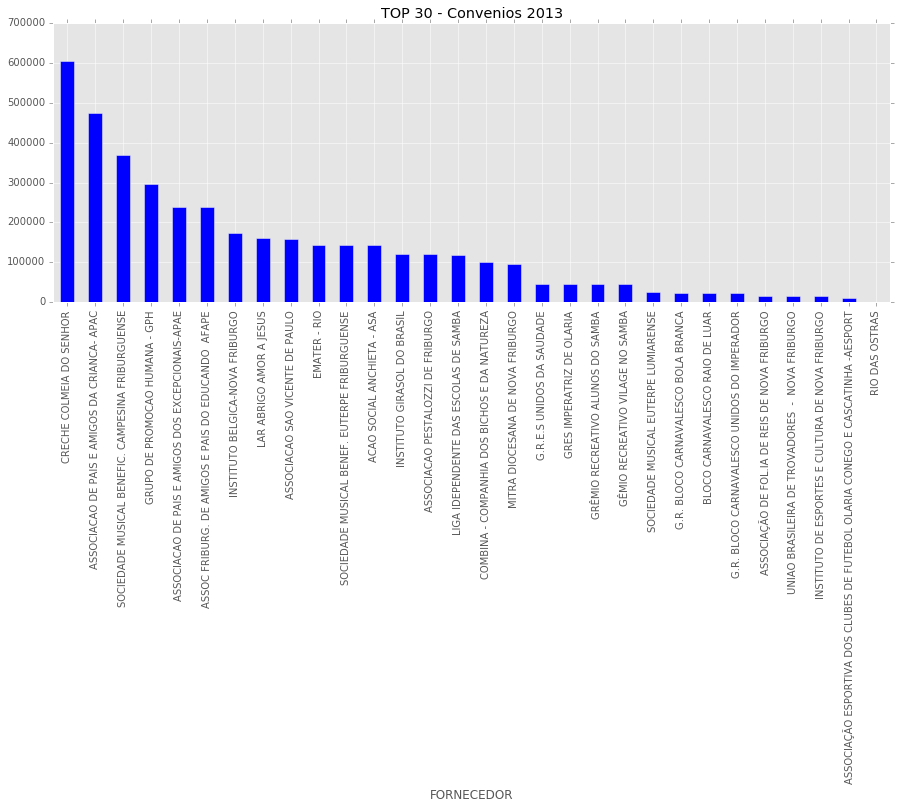

In [136]:
TOP30Convenios2013['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Convenios 2013')

In [137]:
maiores_convenios2012 = convenios2012.groupby(["FORNECEDOR"], as_index=True)
TOP30Convenios2012 = maiores_convenios2012.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Convenios2012

,VALOR
FORNECEDOR,
CRECHE COLMEIA DO SENHOR,R$ 459106.00
ASSOCIACAO DE PAIS E AMIGOS DOS EXCEPCIONAIS-APAE,R$ 252704.65
INSTITUTO BELGICA-NOVA FRIBURGO,R$ 252000.00
GRUPO DE PROMOCAO HUMANA - GPH,R$ 228098.16
ASSOC FRIBURG. DE AMIGOS E PAIS DO EDUCANDO AFAPE,R$ 137812.50
LIGA IDEPENDENTE DAS ESCOLAS DE SAMBA,R$ 117590.00
ACAO SOCIAL ANCHIETA - ASA,R$ 95682.85
SOCIEDADE MUSICAL BENEFIC. CAMPESINA FRIBURGUENSE,R$ 84000.00
SOCIEDADE MUSICAL BENEF. EUTERPE FRIBURGUENSE,R$ 84000.00


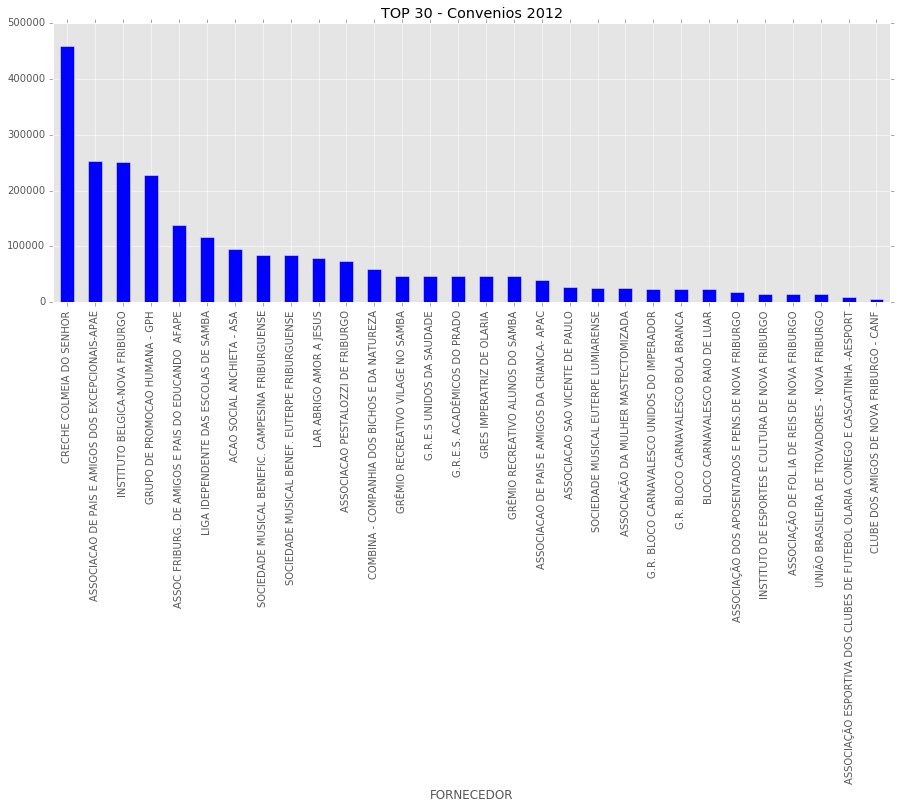

In [138]:
TOP30Convenios2012['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Convenios 2012')

In [40]:
maiores_convenios2011 = convenios2011.groupby(["FORNECEDOR"], as_index=True)
TOP30Convenios2011 = maiores_convenios2011.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Convenios2011

,VALOR
FORNECEDOR,
CRECHE COLMEIA DO SENHOR,R$ 310000.00
GRUPO DE PROMOCAO HUMANA - GPH,R$ 228908.16
ASSOCIACAO DE PAIS E AMIGOS DOS EXCEPCIONAIS-APAE,R$ 192976.33
ASSOC FRIBURG. DE AMIGOS E PAIS DO EDUCANDO AFAPE,R$ 168787.22
INSTITUTO BELGICA-NOVA FRIBURGO,R$ 126000.00
SOCIEDADE MUSICAL BENEF. EUTERPE FRIBURGUENSE,R$ 84000.00
SOCIEDADE MUSICAL BENEFIC. CAMPESINA FRIBURGUENSE,R$ 84000.00
LAR ABRIGO AMOR A JESUS,R$ 80000.00
ASSOCIACAO PESTALOZZI DE FRIBURGO,R$ 73835.71


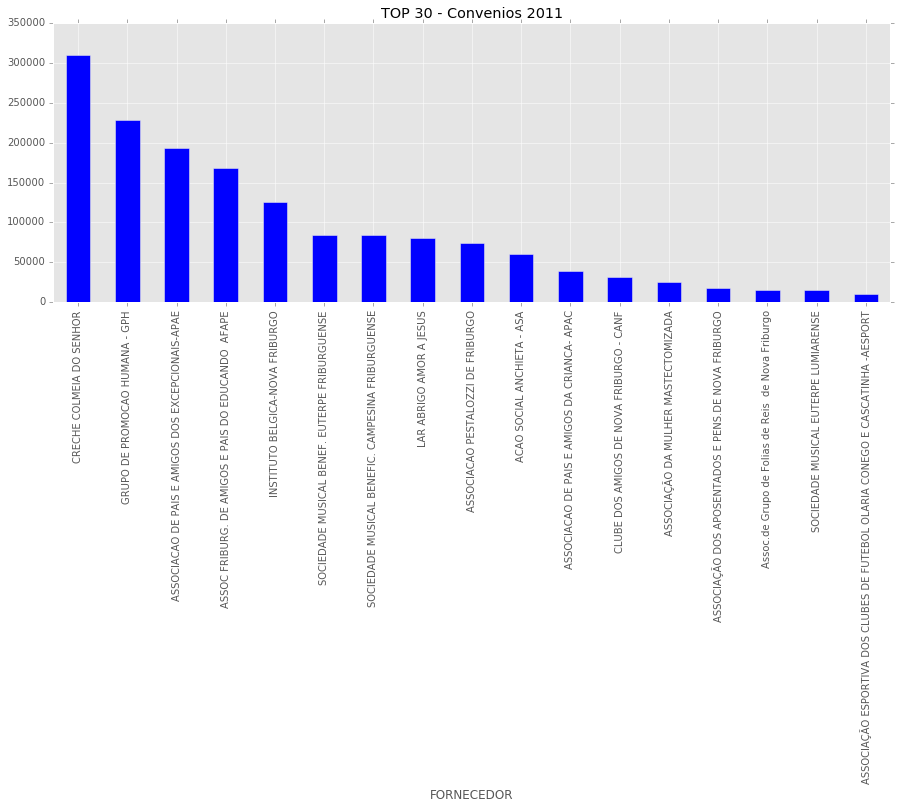

In [41]:
TOP30Convenios2011['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Convenios 2011')

In [42]:
maiores_convenios2010 = convenios2010.groupby(["FORNECEDOR"], as_index=True)
TOP30Convenios2010 = maiores_convenios2010.sum().sort_values('VALOR',ascending=[False])[:30]
TOP30Convenios2010

,VALOR
FORNECEDOR,
CRECHE COLMEIA DO SENHOR,R$ 273420.00
ASSOCIACAO DE PAIS E AMIGOS DOS EXCEPCIONAIS-APAE,R$ 165044.23
ASSOC FRIBURG. DE AMIGOS E PAIS DO EDUCANDO AFAPE,R$ 137812.50
ASSOCIACAO PESTALOZZI DE FRIBURGO,R$ 68035.21
GRUPO DE PROMOCAO HUMANA - GPH,R$ 50715.00
ACAO SOCIAL ANCHIETA - ASA,R$ 42000.00
ASSOCIACAO DOS ARTISTAS DE NOVA FRIBURGO,R$ 20000.00
CLUBE DOS AMIGOS DE NOVA FRIBURGO - CANF,R$ 5181.04


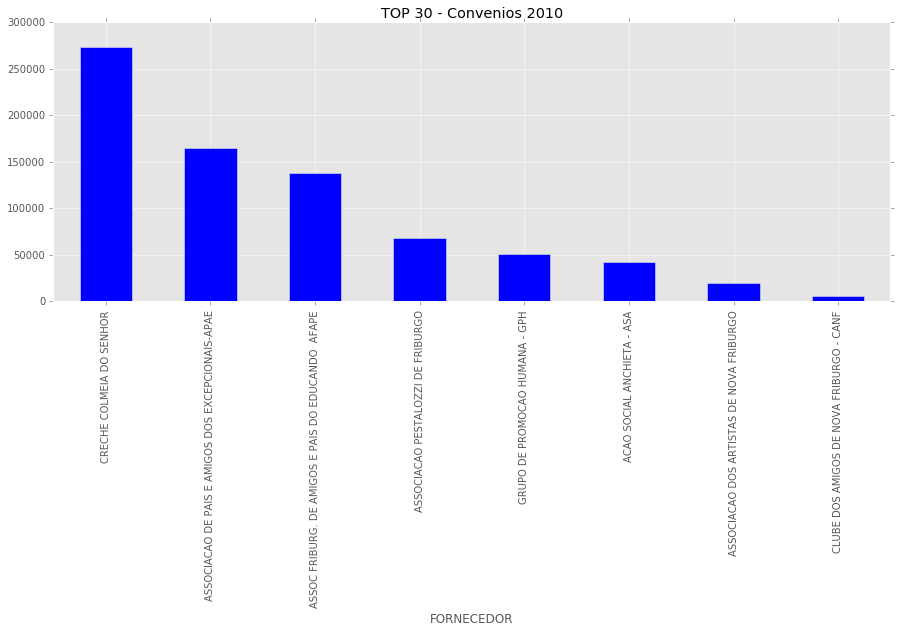

In [43]:
TOP30Convenios2010['VALOR'].plot(kind='bar', figsize=(15,5), title=u'TOP 30 - Convenios 2010')